# Dacon주최 Covid 데이터 분석 대회 준비

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rc('font',family='Malgun Gothic')

In [2]:
import warnings
warnings.filterwarnings(action='ignore')

In [3]:
region = pd.read_csv("C:/Users/joyh1/Desktop/GitRepo/data/Region.csv")
timeprovince = pd.read_csv("C:/Users/joyh1/Desktop/GitRepo/data/TimeProvince.csv")
timegender = pd.read_csv("C:/Users/joyh1/Desktop/GitRepo/data/TimeGender.csv")
timeage = pd.read_csv("C:/Users/joyh1/Desktop/GitRepo/data/TimeAge.csv")
time = pd.read_csv("C:/Users/joyh1/Desktop/GitRepo/data/Time.csv")
patientinfo = pd.read_csv("C:/Users/joyh1/Desktop/GitRepo/data/PatientInfo.csv")
patientroute = pd.read_csv("C:/Users/joyh1/Desktop/GitRepo/data/PatientRoute.csv")
case = pd.read_csv("C:/Users/joyh1/Desktop/GitRepo/data/Case.csv")
weather = pd.read_csv("C:/Users/joyh1/Desktop/GitRepo/data/Weather.csv")

In [4]:
case.head()

,case_id,province,city,group,infection_case,confirmed,latitude,longitude
0,1000001,Seoul,Guro-gu,True,Guro-gu Call Center,79,37.508163,126.884387
1,1000002,Seoul,Dongdaemun-gu,True,Dongan Church,24,37.592888,127.056766
2,1000003,Seoul,Eunpyeong-gu,True,Eunpyeong St. Mary's Hospital,14,37.63369,126.9165
3,1000004,Seoul,Seongdong-gu,True,Seongdong-gu APT,13,37.55713,127.0403
4,1000005,Seoul,Jongno-gu,True,Jongno Community Center,10,37.57681,127.006


In [4]:
case.shape

(81, 8)

In [5]:
case.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   case_id         81 non-null     int64 
 1   province        81 non-null     object
 2   city            81 non-null     object
 3   group           81 non-null     bool  
 4   infection_case  81 non-null     object
 5   confirmed       81 non-null     int64 
 6   latitude        81 non-null     object
 7   longitude       81 non-null     object
dtypes: bool(1), int64(2), object(5)
memory usage: 4.6+ KB


In [7]:
case.isnull().sum()

case_id           0
province          0
city              0
group             0
infection_case    0
confirmed         0
latitude          0
longitude         0
dtype: int64

In [10]:
case.columns = ['환자번호','시도','군구','집단감염여부','집단감염장소','확진자누적수','위도','경도']
case.head()

,환자번호,시도,군구,집단감염여부,집단감염장소,확진자누적수,위도,경도
0,1000001,Seoul,Guro-gu,True,Guro-gu Call Center,79,37.508163,126.884387
1,1000002,Seoul,Dongdaemun-gu,True,Dongan Church,24,37.592888,127.056766
2,1000003,Seoul,Eunpyeong-gu,True,Eunpyeong St. Mary's Hospital,14,37.63369,126.9165
3,1000004,Seoul,Seongdong-gu,True,Seongdong-gu APT,13,37.55713,127.0403
4,1000005,Seoul,Jongno-gu,True,Jongno Community Center,10,37.57681,127.006


In [11]:
import seaborn as sns

In [26]:
case['집단감염장소'].value_counts()

etc                                      17
Shincheonji Church                       15
contact with patient                      8
overseas inflow                           5
Cheongdo Daenam Hospital                  3
Guro-gu Call Center                       3
Onchun Church                             2
Seosan-si Laboratory                      2
gym facility in Cheonan                   2
Geochang-gun Woongyang-myeon              1
Jin-gu Academy                            1
Dongan Church                             1
Changnyeong Coin Karaoke                  1
Suwon Saeng Myeong Saem Church            1
Bundang Jesaeng Hospital                  1
Pilgrimage to Israel                      1
Ministry of Oceans and Fisheries          1
Jung-gu Fashion Company                   1
River of Grace Community Church           1
Jongno Community Center                   1
Hanmaeum Changwon Hospital                1
Goesan-gun Jangyeon-myeon                 1
Eunpyeong St. Mary's Hospital   

In [34]:
df_location = pd.DataFrame(case.groupby(['집단감염장소'])['확진자누적수'].max())
df_location = df_location.sort_values(by=['확진자누적수'], ascending=False).reset_index()
df_location.head()

,집단감염장소,확진자누적수
0,Shincheonji Church,4359
1,etc,1056
2,contact with patient,649
3,Cheongdo Daenam Hospital,119
4,gym facility in Cheonan,104


In [5]:
from plotnine import *

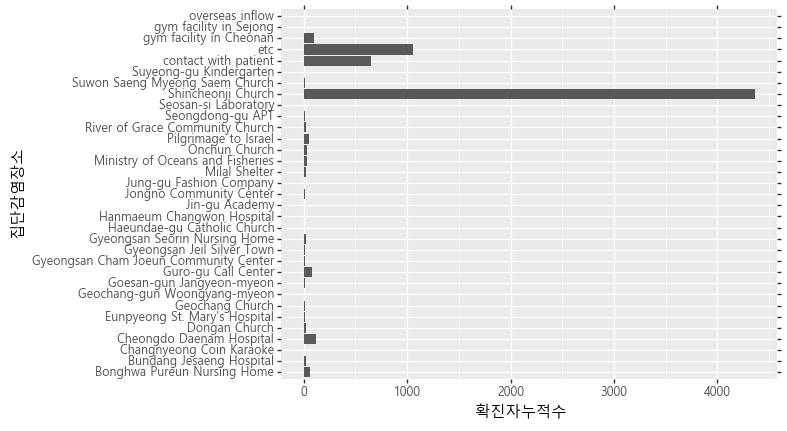

<ggplot: (141719547312)>

In [41]:
(ggplot(df_location)
 +aes(x='집단감염장소', y='확진자누적수')
 +geom_bar(stat='identity', position='dodge')
 +coord_flip()
 +theme(text=element_text(family="Malgun Gothic"))
)

In [47]:
case.head()

,환자번호,시도,군구,집단감염여부,집단감염장소,확진자누적수,위도,경도
0,1000001,Seoul,Guro-gu,True,Guro-gu Call Center,79,37.508163,126.884387
1,1000002,Seoul,Dongdaemun-gu,True,Dongan Church,24,37.592888,127.056766
2,1000003,Seoul,Eunpyeong-gu,True,Eunpyeong St. Mary's Hospital,14,37.63369,126.9165
3,1000004,Seoul,Seongdong-gu,True,Seongdong-gu APT,13,37.55713,127.0403
4,1000005,Seoul,Jongno-gu,True,Jongno Community Center,10,37.57681,127.006


In [52]:
case['집단감염장소'] = case['집단감염장소'].str.replace("\n","")

In [64]:
group_location = case.loc[:,['집단감염장소','위도','경도']].drop_duplicates().reset_index(drop=True)
group_location.head()

,집단감염장소,위도,경도
0,Guro-gu Call Center,37.508163,126.884387
1,Dongan Church,37.592888,127.056766
2,Eunpyeong St. Mary's Hospital,37.63369,126.9165
3,Seongdong-gu APT,37.55713,127.0403
4,Jongno Community Center,37.57681,127.006


In [65]:
group_location.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39 entries, 0 to 38
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   집단감염장소  39 non-null     object
 1   위도      39 non-null     object
 2   경도      39 non-null     object
dtypes: object(3)
memory usage: 1.0+ KB


In [69]:
group_location['경도'].value_counts()

-             10
127.161627     1
128.4941       1
129.1124       1
129.1256       1
126.884387     1
127.1139       1
127.9552       1
127.917805     1
127.0517       1
127.289        1
129.0771       1
127.056766     1
127.1218       1
126.984377     1
127.9127       1
128.5008       1
129.0633       1
128.5667       1
128.801498     1
128.7621       1
127.006        1
128.7373       1
127.265172     1
128.7368       1
126.9165       1
128.6866       1
126.354443     1
127.0403       1
128.9099       1
Name: 경도, dtype: int64

In [72]:
group_location = group_location.loc[(group_location['경도'] != '-') | (group_location['위도'] != '-')]
group_location

,집단감염장소,위도,경도
0,Guro-gu Call Center,37.508163,126.884387
1,Dongan Church,37.592888,127.056766
2,Eunpyeong St. Mary's Hospital,37.63369,126.9165
3,Seongdong-gu APT,37.55713,127.0403
4,Jongno Community Center,37.57681,127.006
5,Jung-gu Fashion Company,37.562405,126.984377
8,Onchun Church,35.21628,129.0771
9,Suyeong-gu Kindergarten,35.16708,129.1124
10,Haeundae-gu Catholic Church,35.20599,129.1256
11,Jin-gu Academy,35.17371,129.0633


In [73]:
group_location['위도'] = group_location['위도'].astype(float)
group_location['경도'] = group_location['경도'].astype(float)
group_location.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29 entries, 0 to 37
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   집단감염장소  29 non-null     object 
 1   위도      29 non-null     float64
 2   경도      29 non-null     float64
dtypes: float64(2), object(1)
memory usage: 928.0+ bytes


In [74]:
import folium
geo_df = group_location

## 위도 경도 이용해 지도표시 못함 ↑

# ---------------------------------------------------------------------------------------------------------

In [6]:
time.head()

,date,time,test,negative,confirmed,released,deceased
0,2020-01-20,16,1,0,1,0,0
1,2020-01-21,16,1,0,1,0,0
2,2020-01-22,16,4,3,1,0,0
3,2020-01-23,16,22,21,1,0,0
4,2020-01-24,16,27,25,2,0,0


In [7]:
time.shape

(61, 7)

In [8]:
time.columns = ['날짜', '시간', '검사자누적숫자','음성누적숫자','양성누적숫자','완치자누적숫자','사망자누적숫자']
time.head()

,날짜,시간,검사자누적숫자,음성누적숫자,양성누적숫자,완치자누적숫자,사망자누적숫자
0,2020-01-20,16,1,0,1,0,0
1,2020-01-21,16,1,0,1,0,0
2,2020-01-22,16,4,3,1,0,0
3,2020-01-23,16,22,21,1,0,0
4,2020-01-24,16,27,25,2,0,0


In [12]:
pd.DataFrame(time.groupby(['날짜'])['검사자누적숫자'].max())

,검사자누적숫자
날짜,
2020-01-20,1
2020-01-21,1
2020-01-22,4
2020-01-23,22
2020-01-24,27
...,...
2020-03-16,274504
2020-03-17,286716
2020-03-18,295647


In [19]:
df_test = time.pivot_table(index='날짜', values='검사자누적숫자', aggfunc=np.sum).reset_index()
df_test.head()

,날짜,검사자누적숫자
0,2020-01-20,1
1,2020-01-21,1
2,2020-01-22,4
3,2020-01-23,22
4,2020-01-24,27


In [15]:
import seaborn as sns

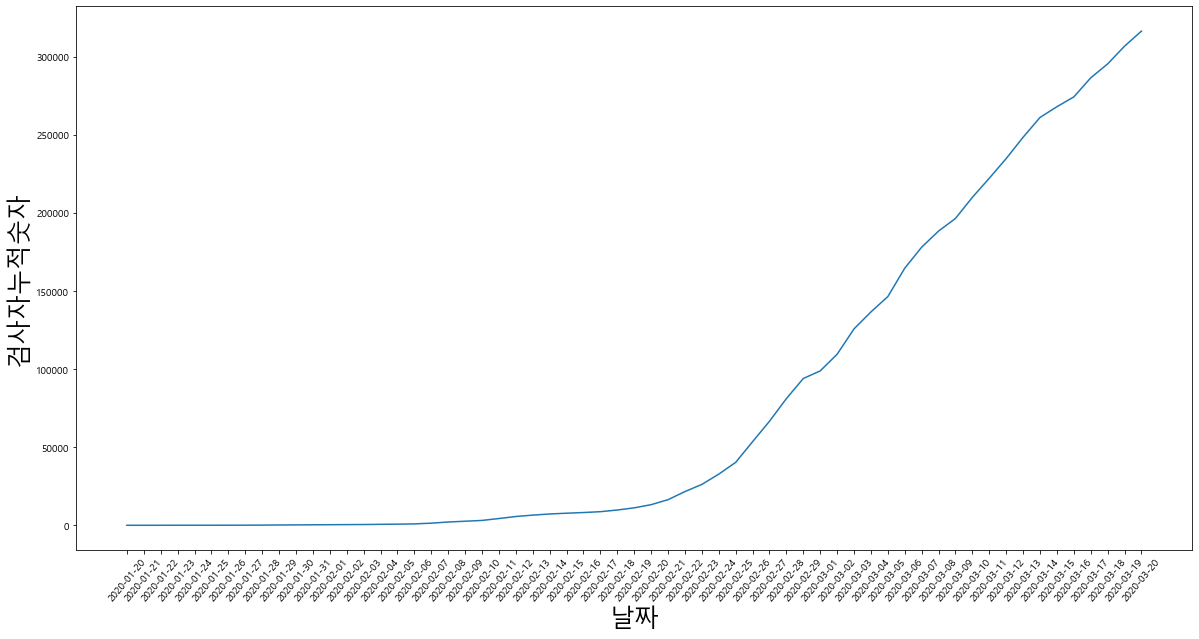

In [29]:
plt.figure(figsize=(20,10))
plt.xticks(rotation=50)
plt.xlabel('날짜', fontsize=25)
plt.ylabel('검사자누적숫자', fontsize=25)
sns.lineplot(data=df_test, x='날짜', y='검사자누적숫자')

In [32]:
df_neg = time.groupby(['날짜'])['음성누적숫자'].max().reset_index()
df_neg.head()

,날짜,음성누적숫자
0,2020-01-20,0
1,2020-01-21,0
2,2020-01-22,3
3,2020-01-23,21
4,2020-01-24,25


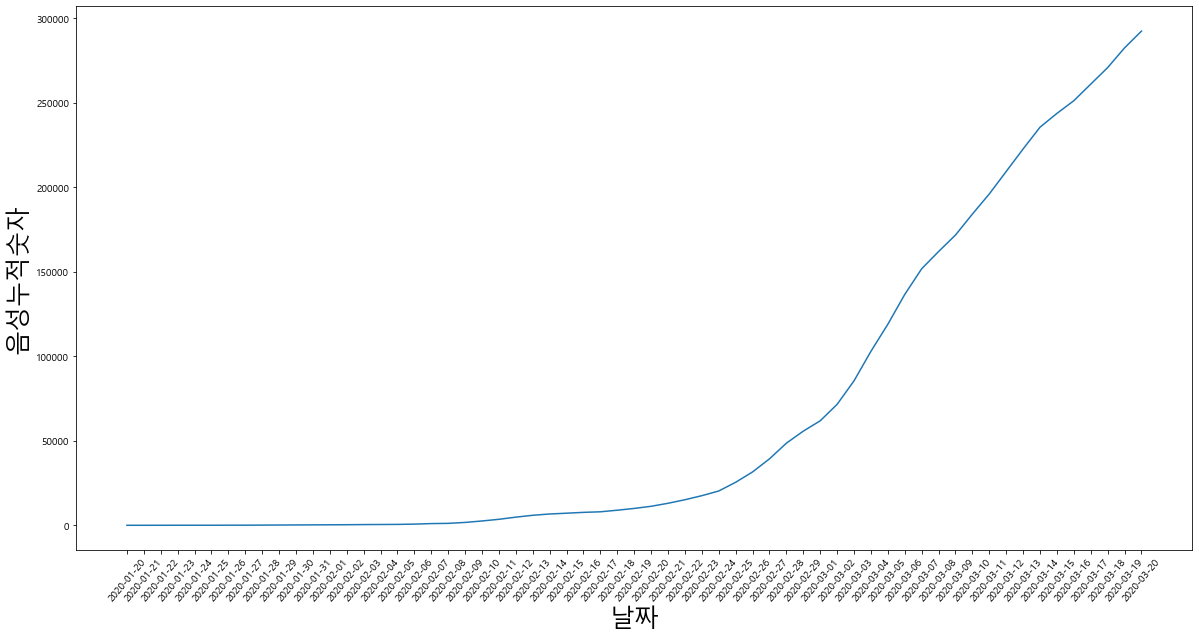

In [33]:
plt.figure(figsize=(20,10))
plt.xticks(rotation=50)
plt.xlabel('날짜',fontsize=25)
plt.ylabel('음성누적숫자', fontsize=25)
sns.lineplot(data=df_neg, x='날짜', y='음성누적숫자')

In [34]:
df_pos = time.groupby(['날짜'])['양성누적숫자'].max().reset_index()
df_pos.head()

,날짜,양성누적숫자
0,2020-01-20,1
1,2020-01-21,1
2,2020-01-22,1
3,2020-01-23,1
4,2020-01-24,2


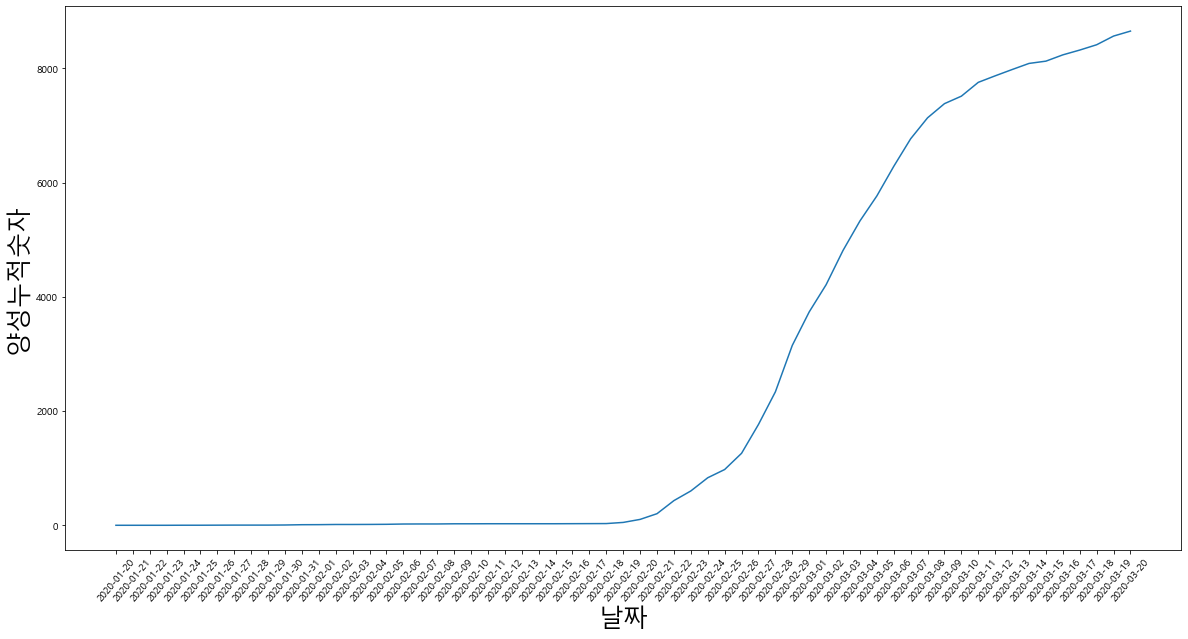

In [36]:
plt.figure(figsize=(20,10))
plt.xticks(rotation=50)
plt.xlabel('날짜',fontsize=25)
plt.ylabel('양성누적숫자', fontsize=25)
sns.lineplot(data=df_pos, x='날짜', y='양성누적숫자')

In [38]:
df_rel = time.groupby(['날짜'])['완치자누적숫자'].max().reset_index()
df_rel.head()

,날짜,완치자누적숫자
0,2020-01-20,0
1,2020-01-21,0
2,2020-01-22,0
3,2020-01-23,0
4,2020-01-24,0


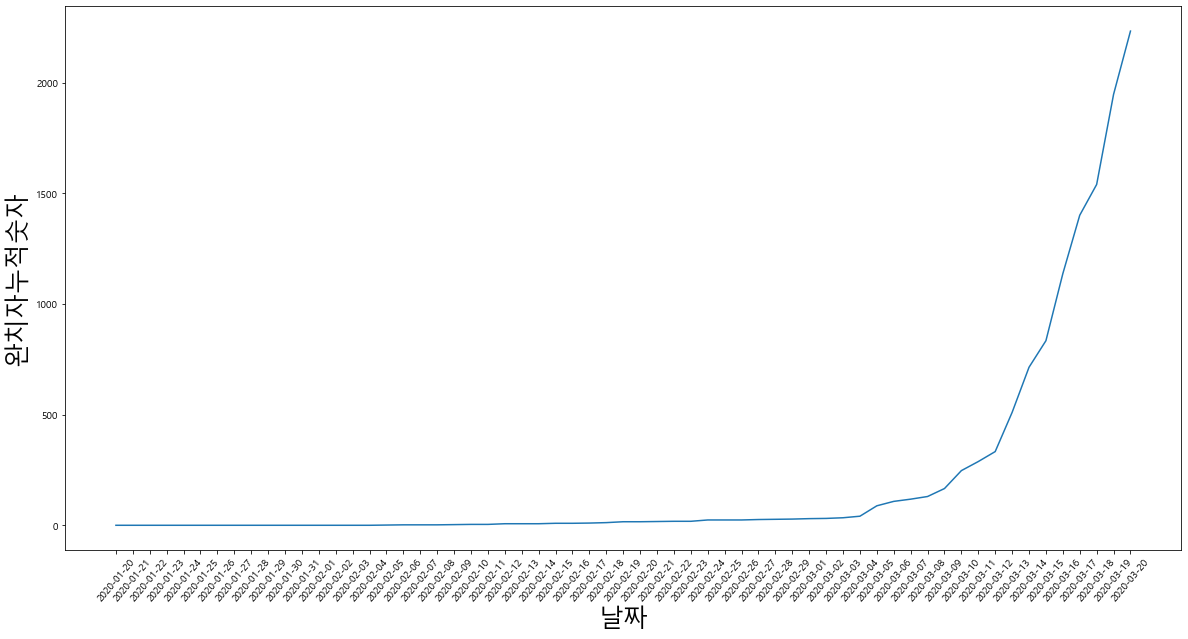

In [40]:
plt.figure(figsize=(20,10))
plt.xticks(rotation=50)
plt.xlabel('날짜',fontsize=25)
plt.ylabel('완치자성누적숫자', fontsize=25)
sns.lineplot(data=df_rel, x='날짜', y='완치자누적숫자')

In [39]:
df_dec = time.groupby(['날짜'])['사망자누적숫자'].max().reset_index()
df_dec.head()

,날짜,사망자누적숫자
0,2020-01-20,0
1,2020-01-21,0
2,2020-01-22,0
3,2020-01-23,0
4,2020-01-24,0


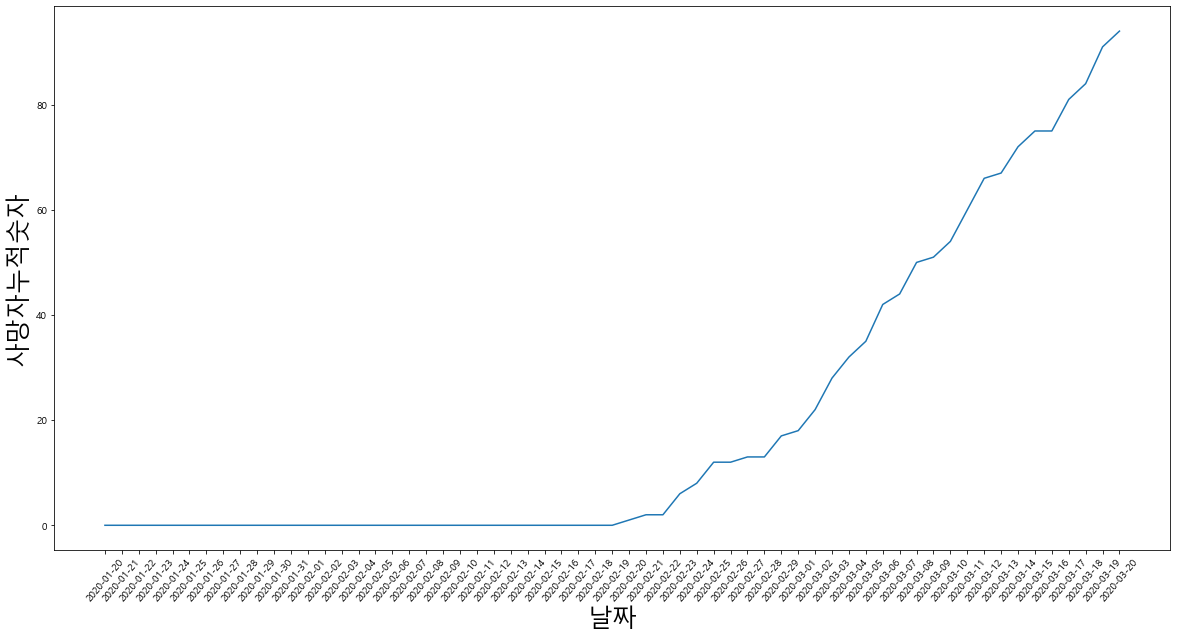

In [41]:
plt.figure(figsize=(20,10))
plt.xticks(rotation=50)
plt.xlabel('날짜',fontsize=25)
plt.ylabel('사망자성누적숫자', fontsize=25)
sns.lineplot(data=df_dec, x='날짜', y='사망자누적숫자')

In [44]:
timeage.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171 entries, 0 to 170
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   date       171 non-null    object
 1   time       171 non-null    int64 
 2   age        171 non-null    object
 3   confirmed  171 non-null    int64 
 4   deceased   171 non-null    int64 
dtypes: int64(3), object(2)
memory usage: 6.8+ KB


In [47]:
timeage.isnull().sum()

date         0
time         0
age          0
confirmed    0
deceased     0
dtype: int64

In [48]:
timeage.head()

,date,time,age,confirmed,deceased
0,2020-03-02,0,0s,32,0
1,2020-03-02,0,10s,169,0
2,2020-03-02,0,20s,1235,0
3,2020-03-02,0,30s,506,1
4,2020-03-02,0,40s,633,1


In [51]:
timeage['time'].value_counts() # time칼럼 의미 없음

0    171
Name: time, dtype: int64

In [53]:
timeage = timeage.drop(['time'], axis=1)
timeage.columns = ['날짜','연령대','확진자누적수','사망자누적수']
timeage.head()

,날짜,연령대,확진자누적수,사망자누적수
0,2020-03-02,0s,32,0
1,2020-03-02,10s,169,0
2,2020-03-02,20s,1235,0
3,2020-03-02,30s,506,1
4,2020-03-02,40s,633,1


In [54]:
# 날짜 object로되있는거 datetime형식으로 바꾸기
timeage['날짜'] = pd.to_datetime(timeage['날짜'])

In [55]:
timeage.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171 entries, 0 to 170
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   날짜      171 non-null    datetime64[ns]
 1   연령대     171 non-null    object        
 2   확진자누적수  171 non-null    int64         
 3   사망자누적수  171 non-null    int64         
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 5.5+ KB


In [58]:
# 연령대 value들 종류 보기
timeage['연령대'].unique()

array(['0세이상 10세미만', '10s', '20s', '30s', '40s', '50s', '60s', '70s',
       '80s'], dtype=object)

In [61]:
timeage.loc[timeage['연령대'] == '0s', '연령대'] = '0세이상 10세미만'
timeage.loc[timeage['연령대'] == '10s', '연령대'] = '10세이상 20세미만'
timeage.loc[timeage['연령대'] == '20s', '연령대'] = '20세이상 30세미만'
timeage.loc[timeage['연령대'] == '30s', '연령대'] = '30세이상 40세미만'
timeage.loc[timeage['연령대'] == '40s', '연령대'] = '40세이상 50세미만'
timeage.loc[timeage['연령대'] == '50s', '연령대'] = '50세이상 60세미만'
timeage.loc[timeage['연령대'] == '60s', '연령대'] = '60세이상 70세미만'
timeage.loc[timeage['연령대'] == '70s', '연령대'] = '70세이상 80세미만'
timeage.loc[timeage['연령대'] == '80s', '연령대'] = '80세이상'
print(timeage.head())
print()
print(timeage['연령대'].unique())

          날짜          연령대  확진자누적수  사망자누적수
0 2020-03-02   0세이상 10세미만      32       0
1 2020-03-02  10세이상 20세미만     169       0
2 2020-03-02  20세이상 30세미만    1235       0
3 2020-03-02  30세이상 40세미만     506       1
4 2020-03-02  40세이상 50세미만     633       1

['0세이상 10세미만' '10세이상 20세미만' '20세이상 30세미만' '30세이상 40세미만' '40세이상 50세미만'
 '50세이상 60세미만' '60세이상 70세미만' '70세이상 80세미만' '80세이상']


In [62]:
timeage.head()

,날짜,연령대,확진자누적수,사망자누적수
0,2020-03-02,0세이상 10세미만,32,0
1,2020-03-02,10세이상 20세미만,169,0
2,2020-03-02,20세이상 30세미만,1235,0
3,2020-03-02,30세이상 40세미만,506,1
4,2020-03-02,40세이상 50세미만,633,1


<Figure size 1440x360 with 0 Axes>

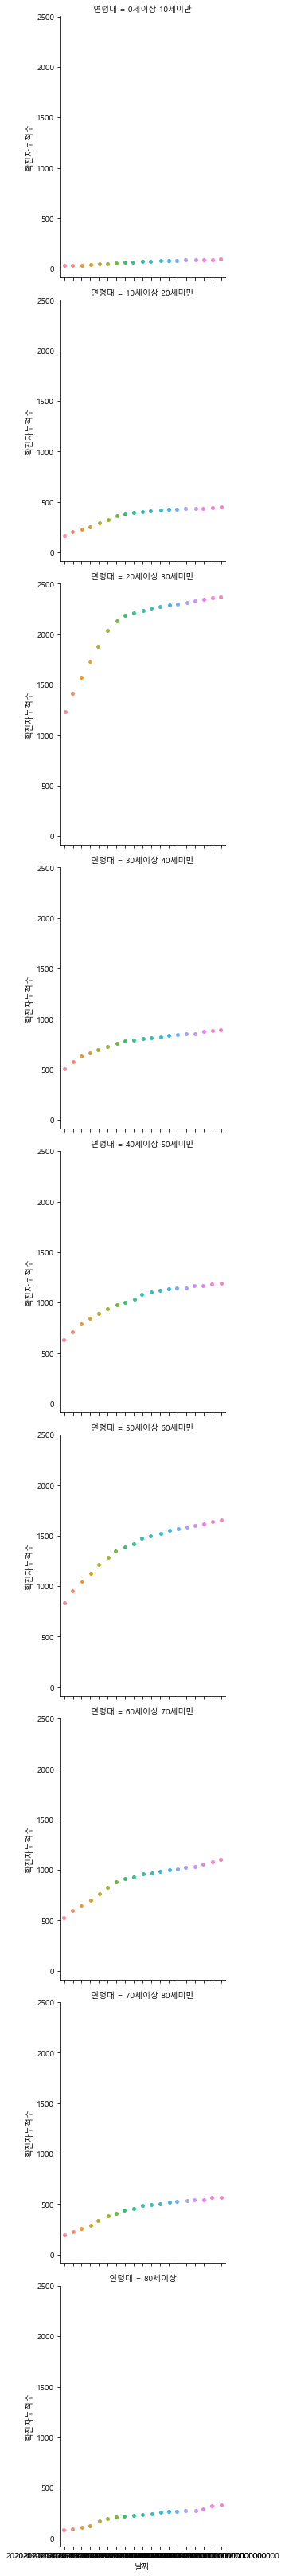

In [74]:
# 연령대 별로 날짜순으로 환자누적수 변화율 보기
plt.figure(figsize=(20,5))
sns.catplot(data=timeage, x='날짜', y='확진자누적수', col='연령대', col_wrap=1, ci=None)